<a href="https://colab.research.google.com/github/nirmalghimire/R-Catalog/blob/main/Thesis_Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Load Required Libraries
import pandas as pd

# Load Data (Final Data)
final_file_path = '/content/drive/My Drive/Thesis & Dissertation/all ETDs report.xlsx'
td_data = pd.read_excel(final_file_path)

# Checking the dimension of the dataset
print(td_data.shape)
td_data.info()

Mounted at /content/drive
(279, 225)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Columns: 225 entries, title to publications_collected_into
dtypes: bool(3), float64(183), int64(4), object(35)
memory usage: 484.8+ KB


In [ ]:
# Subset the data
td_data_subset = td_data[['submission_date', 'date_posted', 'document_type', 'publication']]

# Checking the dimension of the dataset
print(td_data_subset.shape)
td_data_subset.info()

(279, 4)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279 entries, 0 to 278
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   submission_date  279 non-null    object
 1   date_posted      279 non-null    object
 2   document_type    279 non-null    object
 3   publication      279 non-null    object
dtypes: object(4)
memory usage: 8.8+ KB


In [ ]:
# Rename 'publication' to 'department'
td_data_subset = td_data_subset.rename(columns={'publication': 'department'})

# Checking the column names
print(td_data_subset.columns)

Index(['submission_date', 'date_posted', 'document_type', 'department'], dtype='object')


In [ ]:
# Recode the document types as specified
td_data_subset['document_type'] = td_data_subset['document_type'].replace({
    'campus_dissertation': 'dissertation',
    'campus_thesis': 'thesis',
    'restricted_dnp_project': 'oa_dnp_project'
})
# Checking the summary of document_type
td_data_subset['document_type'].value_counts()

document_type
thesis            149
dissertation       73
oa_dnp_project     57
Name: count, dtype: int64

In [ ]:
# Convert submission_date and date_posted to datetime
td_data_subset['submission_date'] = pd.to_datetime(td_data_subset['submission_date'], errors='coerce')
td_data_subset['date_posted'] = pd.to_datetime(td_data_subset['date_posted'], errors='coerce')

# Checking the summary of the submission_date and date_posted
print(td_data_subset[['submission_date', 'date_posted']].describe())

                     submission_date                    date_posted
count                            279                            279
mean   2022-08-01 14:30:32.125447936  2022-08-03 01:37:25.860215040
min              2019-12-20 10:01:03            2020-01-06 11:46:39
25%              2021-05-05 15:13:30     2021-05-05 23:15:31.500000
50%              2022-08-25 14:53:26            2022-08-26 07:05:13
75%       2023-08-06 01:17:25.500000            2023-08-08 09:55:11
max              2024-05-30 18:31:16            2024-05-31 06:30:59


In [ ]:
# Extract just year from the date columns (no decimal places)
td_data_subset['submission_year'] = td_data_subset['submission_date'].dt.year
td_data_subset['posted_year'] = td_data_subset['date_posted'].dt.year
# Checking the summary of the submission_date and date_posted
print(td_data_subset[['submission_year', 'posted_year']].describe())

       submission_year  posted_year
count       279.000000   279.000000
mean       2022.043011  2022.060932
std           1.345769     1.319423
min        2019.000000  2020.000000
25%        2021.000000  2021.000000
50%        2022.000000  2022.000000
75%        2023.000000  2023.000000
max        2024.000000  2024.000000


In [ ]:
# Filter the data for the years 2020 to 2024
df_filtered = td_data_subset[td_data_subset['posted_year'].between(2020, 2024)]

# Checking the summary of date_posted_year column
print(df_filtered['date_posted_year'].value_counts())

date_posted_year
2023    84
2022    55
2021    53
2020    47
2024    40
Name: count, dtype: int64


In [ ]:
# Calculating Document Types by Year
doc_type_by_year = df_filtered.groupby(['posted_year', 'document_type']).size().unstack(fill_value=0)

# Print the Table
print(doc_type_by_year)

document_type  dissertation  oa_dnp_project  thesis
posted_year                                        
2020                     17               9      21
2021                     14               9      30
2022                      7              15      33
2023                     32               9      43
2024                      3              15      22


In [ ]:
# Calculating Document Types by Department
doc_type_by_dept = df_filtered.groupby(['department', 'document_type']).size().unstack(fill_value=0)

# Print the Table
print(doc_type_by_dept)

document_type    dissertation  oa_dnp_project  thesis
department                                           
art_grad                    0               0       3
biology_grad                0               0      19
biotech_grad                0               0      22
ce_grad                     0               0       9
chemistry_grad              0               0       8
comm_grad                   0               0       4
education_grad             20               0       0
ee_grad                     0               0      14
english_grad                0               0      10
history_grad                0               0       5
hkdept_grad                 0               0      15
hrd_grad                   20               0       0
math_grad                   0               0       2
me_grad                     0               0      23
nursing_grad               33               0       0
nursingdnp                  0              57       0
psychology_grad             

In [ ]:
# Calculate Document Types by Department and Year
doc_type_by_dept_year = df_filtered.groupby(['department', 'posted_year', 'document_type']).size().unstack(fill_value=0).fillna(0)

# Print the Table
print(doc_type_by_dept_year)

document_type                dissertation  oa_dnp_project  thesis
department      posted_year                                      
art_grad        2020                    0               0       1
                2021                    0               0       2
biology_grad    2020                    0               0       4
                2021                    0               0       3
                2022                    0               0       4
...                                   ...             ...     ...
nursingdnp      2024                    0              15       0
psychology_grad 2020                    0               0       6
                2021                    0               0       2
                2022                    0               0       5
                2023                    0               0       2

[62 rows x 3 columns]


In [ ]:
# !pip install ace
# import ace
# Call the functions from the ace module directly
# ace.display_dataframe_to_user(name="Document Type by Year", dataframe=doc_type_by_year)
# ace.display_dataframe_to_user(name="Document Type by Department", dataframe=doc_type_by_dept)
# ace.display_dataframe_to_user(name="Document Type by Department and Year", dataframe=doc_type_by_dept_year)

# Displaying the first table
# doc_type_by_year

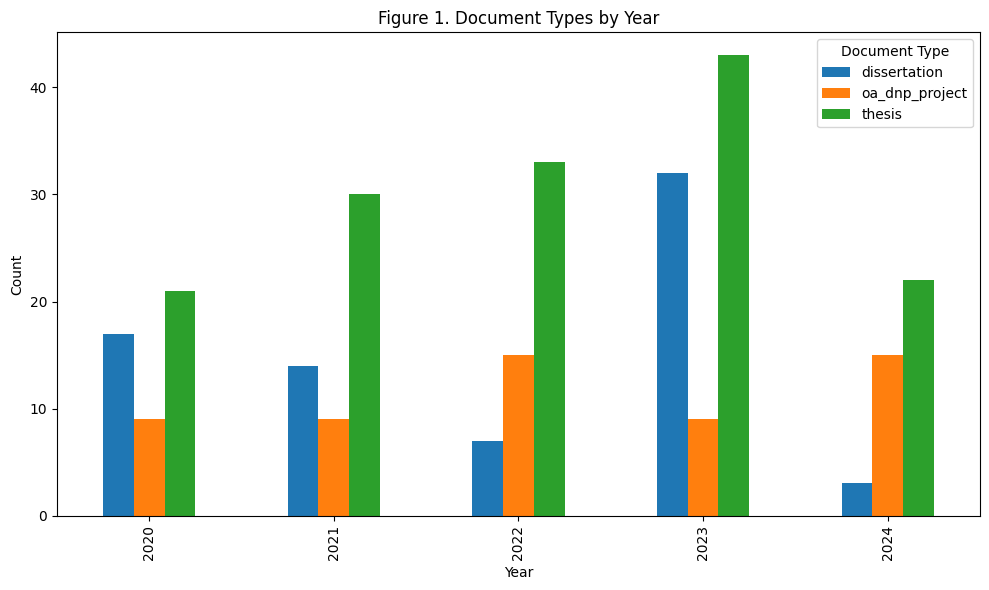

In [ ]:
import matplotlib.pyplot as plt

# Plot for document types by year
doc_type_by_year.plot(kind='bar', stacked=False, figsize=(10, 6))
plt.title('Figure 1. Document Types by Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.legend(title='Document Type')
plt.tight_layout()
plt.show()

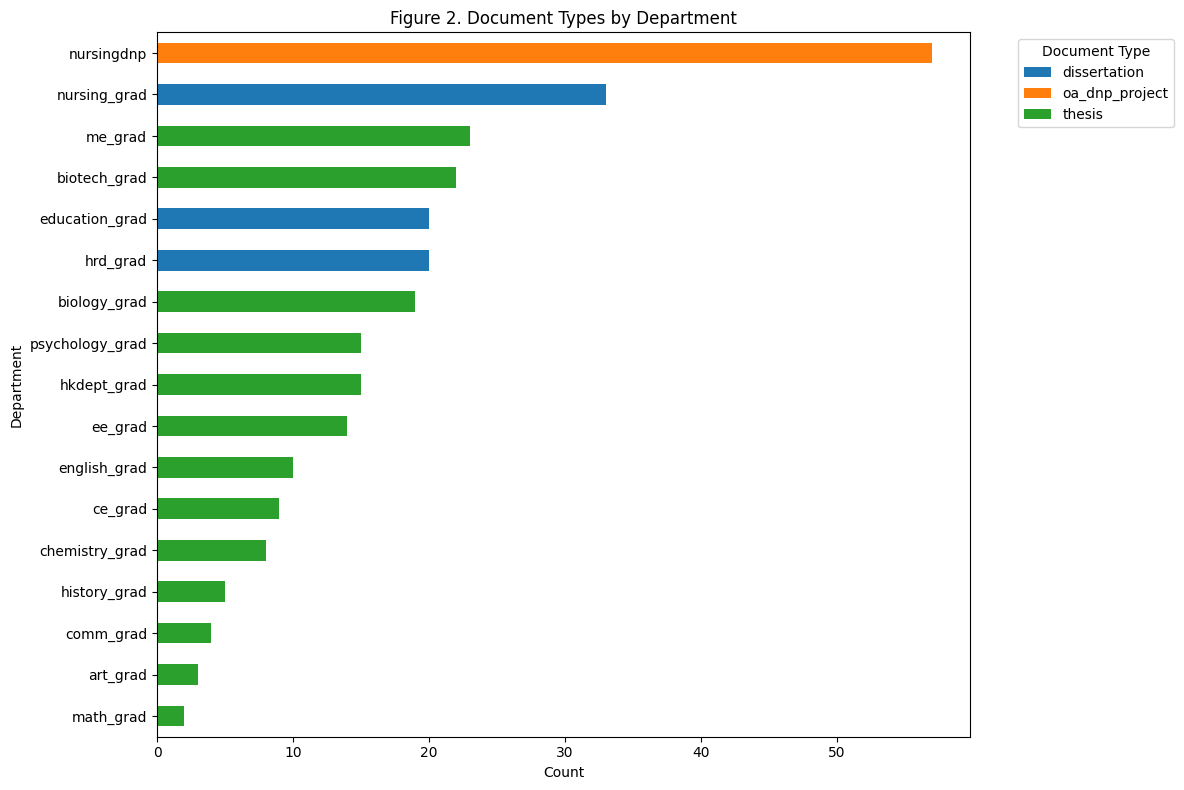

In [ ]:
# Arranging the bars in decreasing order
doc_type_by_dept['total'] = doc_type_by_dept.sum(axis=1)
doc_type_by_dept_sorted = doc_type_by_dept.sort_values('total', ascending=True).drop(columns='total')

# Plotting the sorted document types by department using a stacked bar plot
doc_type_by_dept_sorted.plot(kind='barh', stacked=True, figsize=(12, 8))
plt.title('Figure 2. Document Types by Department')
plt.xlabel('Count')
plt.ylabel('Department')
plt.legend(title='Document Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

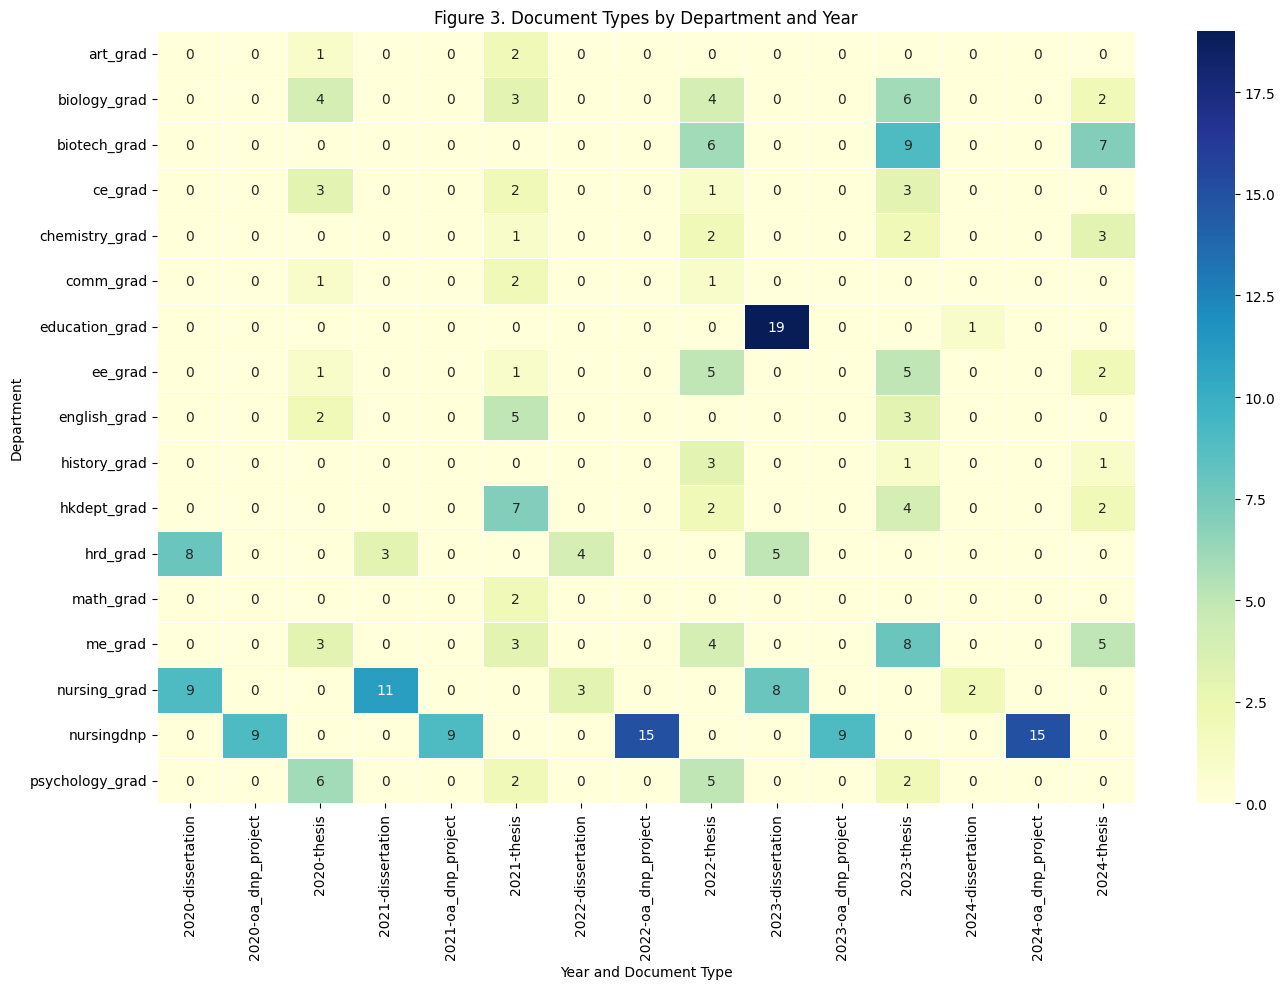

In [ ]:
import seaborn as sns

# Creating a heatmap for document types by department and year with the updated caption
heatmap_data = df_filtered.pivot_table(index='department', columns=['posted_year', 'document_type'], aggfunc='size', fill_value=0)

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_data, annot=True, fmt="d", cmap="YlGnBu", linewidths=.5)
plt.title('Figure 3. Document Types by Department and Year')
plt.xlabel('Year and Document Type')
plt.ylabel('Department')
plt.tight_layout()
plt.show()

In [ ]:
import plotly.express as px
# Create DataFrame with the provided data
data = {
    'posted_year': [2020, 2021, 2022, 2023, 2024],
    'dissertation': [17, 14, 7, 32, 3],
    'oa_dnp_project': [9, 9, 15, 9, 15],
    'thesis': [21, 30, 33, 43, 22]
}

doc_type_by_year = pd.DataFrame(data).set_index('posted_year')

# Melt the DataFrame to have a long format suitable for Plotly
df_melted = doc_type_by_year.reset_index().melt(id_vars='posted_year', var_name='document_type', value_name='count')

# Create the interactive bar plot
fig = px.bar(df_melted, x='posted_year', y='count', color='document_type', barmode='group',
             title='Figure 1. Document Types by Year')

fig.update_layout(
    xaxis_title='Year',
    yaxis_title='Count',
    legend_title='Document Type'
)

# Show the interactive plot
fig.show()